In [18]:
# import dependencies
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [51]:
def gen_3d_fig(x_coords, y_coords, z_coords):
    fig = px.scatter_3d(x=x_coords, y=y_coords, z=z_coords)
    fig_range = [-40, 40]
    fig.update_layout(scene = dict(
        xaxis=dict(range=fig_range),
        yaxis=dict(range=fig_range),
        zaxis=dict(range=fig_range),
        aspectmode="cube"
        )
    )
    fig.update_traces(marker=dict(size=2, color="red", opacity=0.2))
    return fig

def gen_2d_scatter_fig(x_coords, y_coords, title):
    plt.style.use('dark_background')
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_coords, y_coords, 
                        marker='s',           # Square markers
                        c='white',            # White color
                        alpha=0.1,            # Low opacity
                        s=100)                # Marker size
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    ax.grid(True, alpha=0.1)
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)
    ax.set_aspect('equal')
    plt.xlabel('nm')
    plt.ylabel('nm')
    plt.title(title)
    
    return fig

def gen_2d_dist_histogram_fig(x_coords, y_coords, title):
    plt.style.use('default')
    distances = np.sqrt(x_coords **2 + y_coords **2)
    fig, ax = plt.subplots()
    hist = ax.hist(distances, bins=20)
    plt.xlabel('Distance from center (nm)')
    plt.ylabel('# of points')
    plt.title(title)
    return fig


In [20]:
with open("sr_microscopy_data.pickle", "rb") as f:
    sr_microscopy_data = pickle.load(f)
    sr_microscopy_data = np.stack(sr_microscopy_data, axis = 0)

In [33]:
temp_data = sr_microscopy_data[:, (sr_microscopy_data[2,:] >= 4)]
fig = gen_3d_fig(temp_data[0, :], temp_data[1, :], temp_data[2, :])
fig.show()

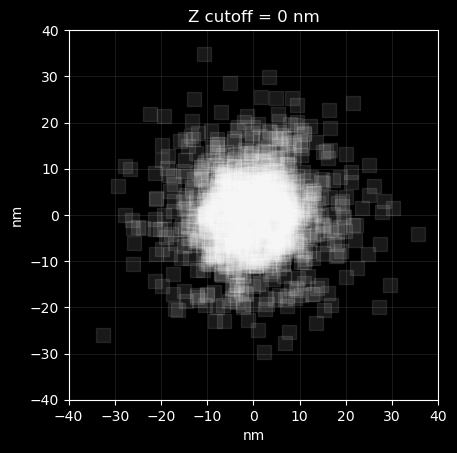

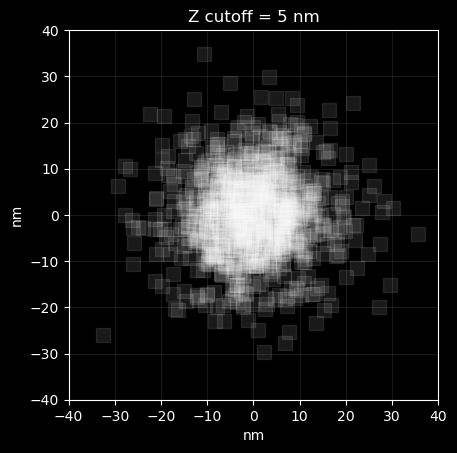

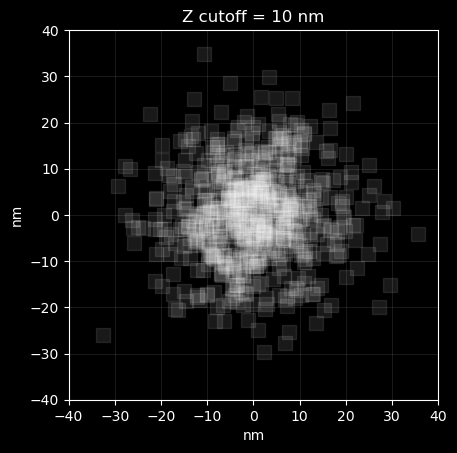

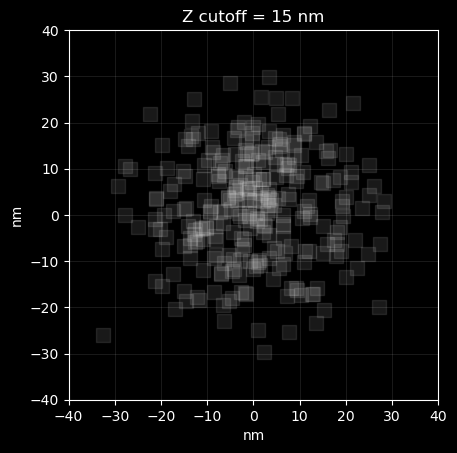

In [42]:
for i in range(0, 20, 5):
    temp_data = sr_microscopy_data[:, (sr_microscopy_data[2,:] >= i)]
    fig = gen_2d_scatter_fig(temp_data[0], temp_data[1], f"Z cutoff = {i} nm")
    fig.show()

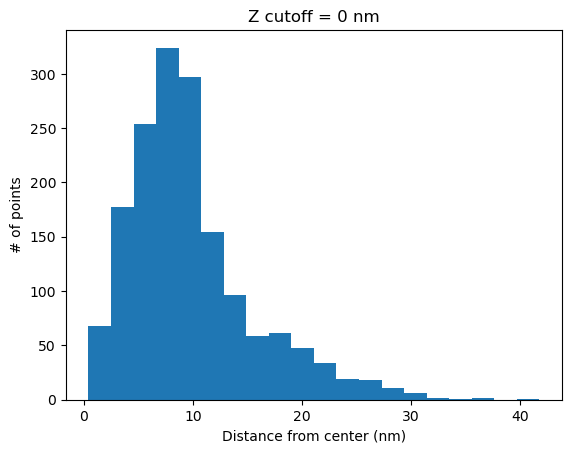

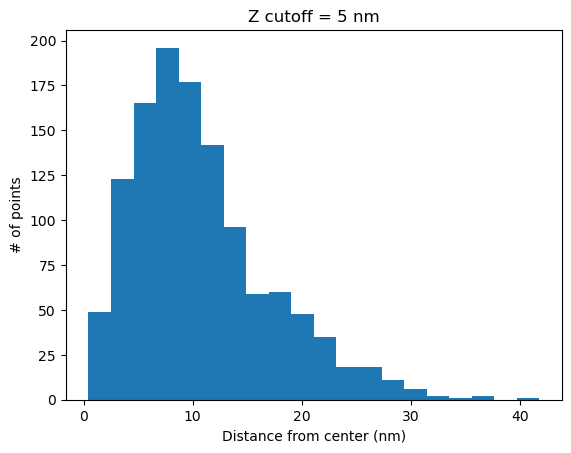

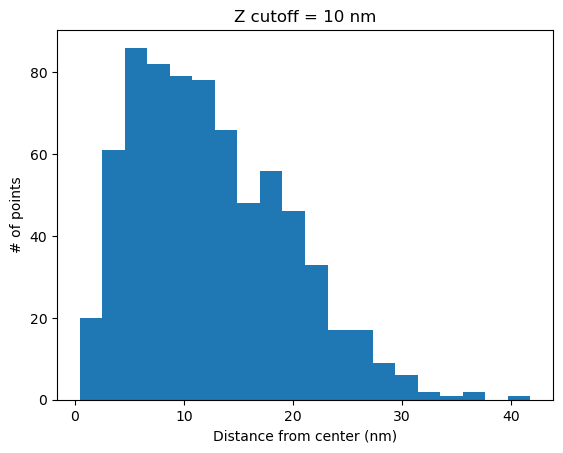

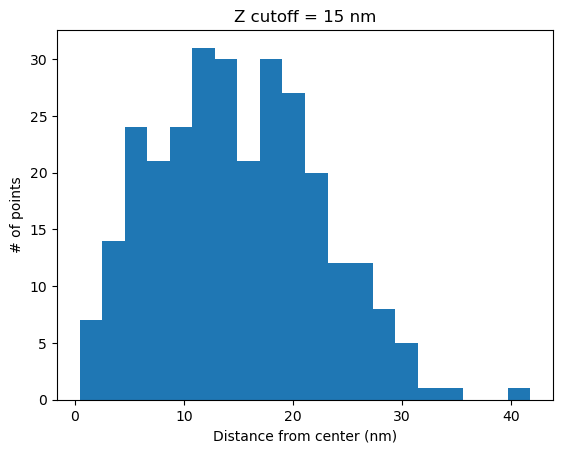

In [52]:
for i in range(0, 20, 5):
    temp_data = sr_microscopy_data[:, (sr_microscopy_data[2,:] >= i)]
    fig = gen_2d_dist_histogram_fig(temp_data[0], temp_data[1], f"Z cutoff = {i} nm")
    fig.show()